In [140]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

from statsmodels.tsa import arima_model

from sklearn import preprocessing, neighbors, grid_search, cross_validation
from sklearn import metrics

%matplotlib inline
plt.style.use('ggplot')

In [141]:
df = pd.read_csv(os.path.join('energy_production_final.csv'))


In [142]:
df

,Year,Biomass,Coal,Crude Oil,Geothermal,...,Natgas (dry production),Nuclear,Solar,Wind,GDP
0,1949,1.549262,11.973882,10.683252,NaN,...,5.377243,0.000000,NaN,NaN,2.000000e+12
1,1950,1.562307,14.060135,11.446729,NaN,...,6.232975,0.000000,NaN,NaN,2.270000e+12
2,1951,1.534669,14.419325,13.036724,NaN,...,7.415733,0.000000,NaN,NaN,2.400000e+12
3,1952,1.474369,12.734313,13.281049,NaN,...,7.963599,0.000000,NaN,NaN,2.530000e+12
4,1953,1.418601,12.277746,13.671076,NaN,...,8.338838,0.000000,NaN,NaN,2.540000e+12
...,...,...,...,...,...,...,...,...,...,...,...
62,2011,4.501348,22.221407,11.952314,0.212311,...,23.405720,8.268698,0.105285,1.167636,1.520000e+13
63,2012,4.405757,20.676893,13.769991,0.211592,...,24.610065,8.061822,0.148110,1.340059,1.540000e+13
64,2013,4.646919,20.001304,15.808860,0.214006,...,24.859072,8.244433,0.212775,1.601359,1.580000e+13
65,2014,4.848900,20.285705,18.552425,0.214490,...,26.718073,8.337559,0.321174,1.727542,1.620000e+13


In [143]:
df.dropna(inplace = True)

df.isnull().sum().sum()

0

After dropping null values, the time series analysis will begin in the year 1984 to the present. Some energy sources did not have historical data before 1984.


In [144]:
df

,Year,Biomass,Coal,Crude Oil,Geothermal,...,Natgas (dry production),Nuclear,Solar,Wind,GDP
35,1984,2.971120,19.719216,18.848237,0.080811,...,18.007933,3.552531,0.000055,0.000068,7.400000e+12
36,1985,3.016233,19.325166,18.992407,0.097421,...,16.980380,4.075563,0.000111,0.000060,7.710000e+12
37,1986,2.932095,19.509466,18.375862,0.107677,...,16.540801,4.380109,0.000147,0.000044,7.940000e+12
38,1987,2.874884,20.141104,17.674787,0.112270,...,17.135819,4.753933,0.000109,0.000037,8.290000e+12
39,1988,3.016049,20.737639,17.278931,0.106338,...,17.598597,5.586968,0.000094,0.000009,8.610000e+12
...,...,...,...,...,...,...,...,...,...,...,...
62,2011,4.501348,22.221407,11.952314,0.212311,...,23.405720,8.268698,0.105285,1.167636,1.520000e+13
63,2012,4.405757,20.676893,13.769991,0.211592,...,24.610065,8.061822,0.148110,1.340059,1.540000e+13
64,2013,4.646919,20.001304,15.808860,0.214006,...,24.859072,8.244433,0.212775,1.601359,1.580000e+13
65,2014,4.848900,20.285705,18.552425,0.214490,...,26.718073,8.337559,0.321174,1.727542,1.620000e+13


In [145]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df.set_index('Year', drop=True, inplace=True)
df.columns = [col.strip() for col in df.columns]
df.head()

,Biomass,Coal,Crude Oil,Geothermal,Hydroelectric,Natgas (dry production),Nuclear,Solar,Wind,GDP
Year,,,,,,,,,,
1984-01-01,2.971120,19.719216,18.848237,0.080811,3.385811,18.007933,3.552531,0.000055,0.000068,7.400000e+12
1985-01-01,3.016233,19.325166,18.992407,0.097421,2.970192,16.980380,4.075563,0.000111,0.000060,7.710000e+12
1986-01-01,2.932095,19.509466,18.375862,0.107677,3.071179,16.540801,4.380109,0.000147,0.000044,7.940000e+12
1987-01-01,2.874884,20.141104,17.674787,0.112270,2.634508,17.135819,4.753933,0.000109,0.000037,8.290000e+12
1988-01-01,3.016049,20.737639,17.278931,0.106338,2.334265,17.598597,5.586968,0.000094,0.000009,8.610000e+12


In [146]:
df.describe()

,Biomass,Coal,Crude Oil,Geothermal,Hydroelectric,Natgas (dry production),Nuclear,Solar,Wind,GDP
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,3.337105,21.806173,14.232479,0.170315,2.831158,20.006917,7.094309,0.082594,0.358330,1.204031e+13
std,0.668092,1.545350,2.778111,0.035551,0.354031,2.732018,1.422027,0.088373,0.563610,2.877182e+12
min,2.624162,17.952726,10.613910,0.080811,2.241858,16.540801,3.552531,0.000055,0.000009,7.400000e+12
25%,2.930991,20.591583,11.957755,0.164113,2.603673,18.362864,6.419224,0.058054,0.030563,9.312500e+12
50%,3.021884,22.111601,13.746445,0.173455,2.747740,19.346141,7.736303,0.063797,0.051476,1.250000e+13
75%,3.571123,22.935372,15.885866,0.187439,3.052588,20.299896,8.228189,0.069791,0.391764,1.462500e+13
max,4.848900,24.045198,19.687846,0.224066,3.640458,27.952466,8.458589,0.430889,1.815716,1.650000e+13


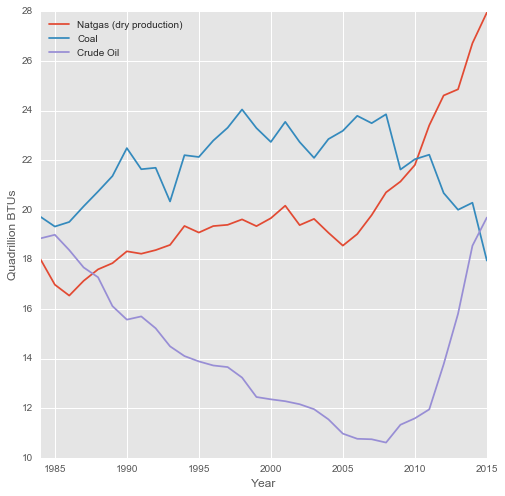

In [147]:
ax = df[[ 'Natgas (dry production)', 'Coal', 'Crude Oil']].plot(label = 'Series', 
                                                                                           figsize = (8,8))
ax.set_ylabel('Quadrillion BTUs')

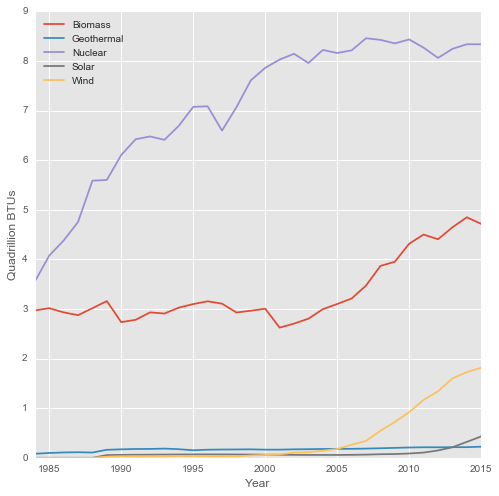

In [148]:
ax = df[['Biomass', 'Geothermal', 'Nuclear', 'Solar', 'Wind']].plot(label = 'Series', 
                                                                                           figsize = (8,8))
ax.set_ylabel('Quadrillion BTUs')

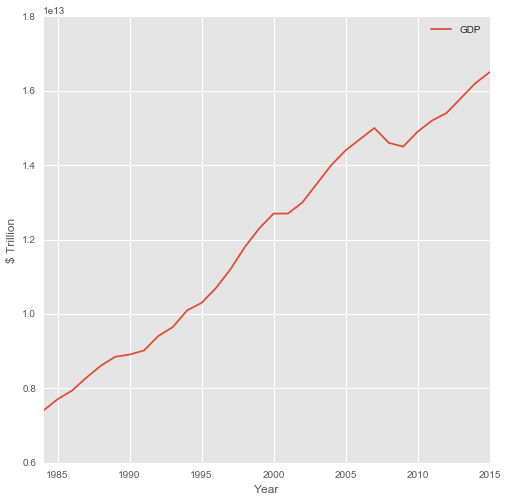

In [149]:
ax = df[['GDP']].plot(label = 'Series', 
                                                                                           figsize = (8,8))
ax.set_ylabel('$ Trillion')

train_df = df.sample(frac = .6, random_state = 0).sort_index()

'Biomass', 'Coal', 'Crude Oil', 'Geothermal', 'Hydroelectric', 'Natgas (dry production)', 'Nuclear', 'Solar', 'Wind'

In [155]:
n = df.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

#X = df.drop('Coal', axis = 1)
#y = df.Coal

train_X = train_df.drop('Coal', axis = 1)
train_y = train_df.Coal

test_X = test_df.drop('Coal', axis = 1)
test_y = test_df.Coal

In [156]:
model = arima_model.ARIMA(train_y, (1, 0, 0), train_X).fit()



//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [157]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Coal   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -19.790
Method:                       css-mle   S.D. of innovations              1.229
Date:                Tue, 15 Nov 2016   AIC                             63.580
Time:                        17:50:58   BIC                             77.717
Sample:                    01-01-1984   HQIC                            67.331
                         - 01-01-2007                                         
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                       2.5325     17.618      0.144      0.888       -31.999    37.064
Biomass                     0.3167      1.126      0.281      0.783        -1.891     2.525
Crude Oil                   0.1419      0.362      0.392      0.701        -0.568     0.851
Geothermal                  5.3166     24.217      0.220      0.830       -42.148    52.781
Hydroelectric               0.6013      0.658      0.914      0.377        -0.688     1.890
Natgas (dry production)     0.4532      0.403      1.125      0.281        -0.336     1.242
Nuclear                     0.4572      0.582      0.786      0.446        -0.683     1.598
Solar                       2.6682     32.752      0.081      0.936       -61.525    66.862
Wind                       -0.7633      3.716     -0.205      0.840        -8.046     6.519
GDP                      2.148e-13   1.39e-07   1.54e-06      1.000     -2.73e-07  2.73e-07
ar.L1.Coal                  0.1694      0.268      0.632      0.539        -0.356     0.695
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.9034           +0.0000j            5.9034            0.0000
-----------------------------------------------------------------------------
"""

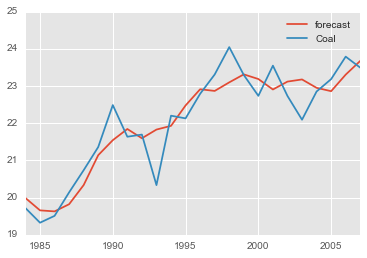

In [158]:
model.plot_predict(0, m - 1)

pass

In [160]:
n = df.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

#X = df.drop('GDP', axis = 1)
#y = df.GDP

train_X = train_df.drop('GDP', axis = 1)
train_y = train_df.GDP

test_X = test_df.drop('GDP', axis = 1)
test_y = test_df.GDP

In [161]:
model = arima_model.ARIMA(train_y, (1, 0, 0), train_X).fit()

In [162]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                -662.772
Method:                       css-mle   S.D. of innovations   238248681729.066
Date:                Tue, 15 Nov 2016   AIC                           1349.545
Time:                        17:53:28   BIC                           1363.682
Sample:                    01-01-1984   HQIC                          1353.295
                         - 01-01-2007                                         
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                    2.363e+13   7.33e+12      3.224      0.007      9.26e+12   3.8e+13
Biomass                 -2.412e+11        nan        nan        nan           nan       nan
Coal                     5.769e+10   8.41e+10      0.686      0.505     -1.07e+11  2.23e+11
Crude Oil               -1.024e+12   1.53e+11     -6.713      0.000     -1.32e+12 -7.25e+11
Geothermal               2.641e+12   9.18e+12      0.288      0.778     -1.54e+13  2.06e+13
Hydroelectric            2.951e+11        nan        nan        nan           nan       nan
Natgas (dry production)   8.33e+10   1.58e+11      0.528      0.606     -2.26e+11  3.92e+11
Nuclear                  1.591e+10   2.46e+11      0.065      0.949     -4.66e+11  4.98e+11
Solar                     -3.7e+13   7.84e+12     -4.722      0.000     -5.24e+13 -2.16e+13
Wind                     3.541e+12   1.31e+12      2.712      0.018      9.82e+11   6.1e+12
ar.L1.GDP                  -0.0017        nan        nan        nan           nan       nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -602.0911           +0.0000j          602.0911            0.5000
-----------------------------------------------------------------------------
"""

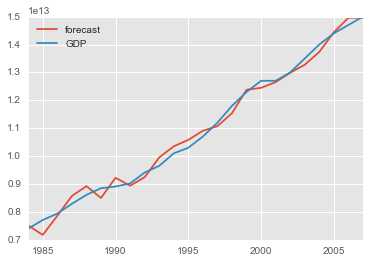

In [163]:
model.plot_predict(0, m - 1)

pass

In [184]:
n = df.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

#X = df.drop('GDP', axis = 1)
#y = df.GDP

train_X = train_df.drop('GDP', axis = 1)
train_y = train_df.GDP

test_X = test_df.drop('GDP', axis = 1)
test_y = test_df.GDP

In [185]:
model = arima_model.ARIMA(train_y, (1, 1, 0), train_X).fit()

In [186]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.GDP   No. Observations:                   23
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -610.560
Method:                       css-mle   S.D. of innovations    81662244008.340
Date:                Tue, 15 Nov 2016   AIC                           1245.121
Time:                        18:09:21   BIC                           1258.746
Sample:                    01-01-1985   HQIC                          1248.547
                         - 01-01-2007                                         
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                   -4.882e+12   2.65e+12     -1.846      0.090     -1.01e+13  3.02e+11
Biomass                  6.732e+11   1.71e+11      3.934      0.002      3.38e+11  1.01e+12
Coal                      2.85e+09   5.23e+10      0.055      0.957     -9.96e+10  1.05e+11
Crude Oil               -7.571e+10   5.45e+10     -1.389      0.190     -1.83e+11  3.11e+10
Geothermal               1.303e+13   4.26e+12      3.061      0.010      4.68e+12  2.14e+13
Hydroelectric            1.953e+11   1.51e+11      1.292      0.221     -1.01e+11  4.91e+11
Natgas (dry production)  1.577e+11   7.11e+10      2.219      0.047      1.84e+10  2.97e+11
Nuclear                 -2.115e+10   1.03e+11     -0.206      0.840     -2.22e+11   1.8e+11
Solar                   -2.068e+13   5.84e+12     -3.540      0.004     -3.21e+13 -9.23e+12
Wind                     -2.65e+12   5.26e+11     -5.041      0.000     -3.68e+12 -1.62e+12
ar.L1.D.GDP                -0.2411      0.507     -0.475      0.643        -1.235     0.753
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.1469           +0.0000j            4.1469            0.5000
-----------------------------------------------------------------------------
"""

In [171]:
n = df.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

#X = df.drop('Crude Oil', axis = 1)
#y = df.Crude Oil

train_X = train_df.drop('Crude Oil', axis = 1)
train_y = train_df['Crude Oil']

test_X = test_df.drop('Crude Oil', axis = 1)
test_y = test_df['Crude Oil']

In [172]:
model = arima_model.ARIMA(train_y, (1, 0, 0), train_X).fit()

//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [173]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Crude Oil   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                   6.020
Method:                       css-mle   S.D. of innovations              1.262
Date:                Tue, 15 Nov 2016   AIC                             11.960
Time:                        17:57:24   BIC                             26.097
Sample:                    01-01-1984   HQIC                            15.711
                         - 01-01-2007                                         
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                      29.2996      3.407      8.601      0.000        22.623    35.976
Biomass                    -0.3307      0.620     -0.533      0.603        -1.546     0.885
Coal                        0.0201      0.075      0.268      0.793        -0.127     0.168
Geothermal                 -6.1851      7.429     -0.833      0.420       -20.746     8.375
Hydroelectric              -0.1124      0.224     -0.502      0.624        -0.551     0.326
Natgas (dry production)    -0.1343      0.129     -1.039      0.318        -0.388     0.119
Nuclear                    -0.4835      0.107     -4.518      0.001        -0.693    -0.274
Solar                     -12.5311     10.258     -1.222      0.244       -32.636     7.574
Wind                        1.1394      1.361      0.837      0.418        -1.528     3.807
GDP                     -6.327e-13   1.39e-07  -4.54e-06      1.000     -2.73e-07  2.73e-07
ar.L1.Crude Oil            -0.0043      0.492     -0.009      0.993        -0.968     0.960
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -233.5831           +0.0000j          233.5831            0.5000
-----------------------------------------------------------------------------
"""

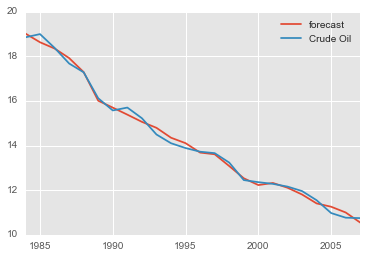

In [174]:
model.plot_predict(0, m - 1)

pass

In [175]:
n = df.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

#X = df.drop('Natgas (dryproduction)', axis = 1)
#y = df.Natgas (dryproduction)

train_X = train_df.drop('Natgas (dry production)', axis = 1)
train_y = train_df['Natgas (dry production)']

test_X = test_df.drop('Natgas (dry production)', axis = 1)
test_y = test_df['Natgas (dry production)']

In [179]:
model = arima_model.ARIMA(train_y, (1, 0, 0), train_X).fit()

//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [180]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Natgas (dry production)   No. Observations:                   24
Model:                          ARMA(1, 0)   Log Likelihood                 -14.081
Method:                            css-mle   S.D. of innovations              1.072
Date:                     Tue, 15 Nov 2016   AIC                             52.163
Time:                             18:00:59   BIC                             66.299
Sample:                         01-01-1984   HQIC                            55.913
                              - 01-01-2007                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                             2.9662        nan        nan        nan           nan       nan
Biomass                           0.2613      0.327      0.800      0.438        -0.379     0.902
Coal                              0.2989        nan        nan        nan           nan       nan
Crude Oil                         0.1842      0.210      0.879      0.396        -0.227     0.595
Geothermal                        4.7411        nan        nan        nan           nan       nan
Hydroelectric                     0.1569      0.150      1.048      0.314        -0.136     0.450
Nuclear                           0.2966      0.350      0.848      0.412        -0.389     0.982
Solar                             2.7446        nan        nan        nan           nan       nan
Wind                             -3.8901      1.615     -2.409      0.032        -7.056    -0.725
GDP                            2.462e-13   1.39e-07   1.76e-06      1.000     -2.73e-07  2.73e-07
ar.L1.Natgas (dry production)     0.2750      0.223      1.232      0.240        -0.163     0.713
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6369           +0.0000j            3.6369            0.0000
-----------------------------------------------------------------------------
"""

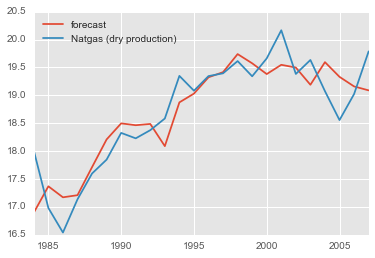

In [181]:
model.plot_predict(0, m - 1)

pass

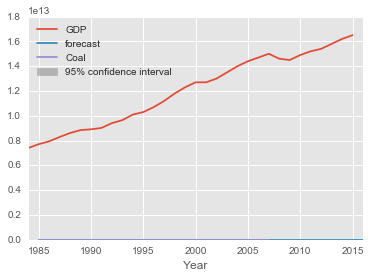

In [159]:
_, ax = plt.subplots()
ax = df.GDP.plot(ax = ax)

model.plot_predict(1, n, exog = test_X, ax = ax)

pass

In [ ]:
model = arima_model.ARIMA(train_y, (1, 1, 0), train_X).fit()

In [ ]:
model.summary()

In [ ]:
model.resid.plot()